In [9]:
import importlib
import itertools
import numpy as np

import visualizers
from geometric_types import Point
import kd_tree as kd_tree_module
from quadtree import Quadtree
importlib.reload(visualizers)
importlib.reload(kd_tree_module)

def conv_to_np_float64_points(points: list[list]) -> list[Point]:
    new_points = []
    for p in points:
        new_points.append(list(map(np.float64, p)))

    return new_points

A, B = (0, 0), (100, 100)

<IPython.core.display.Javascript object>


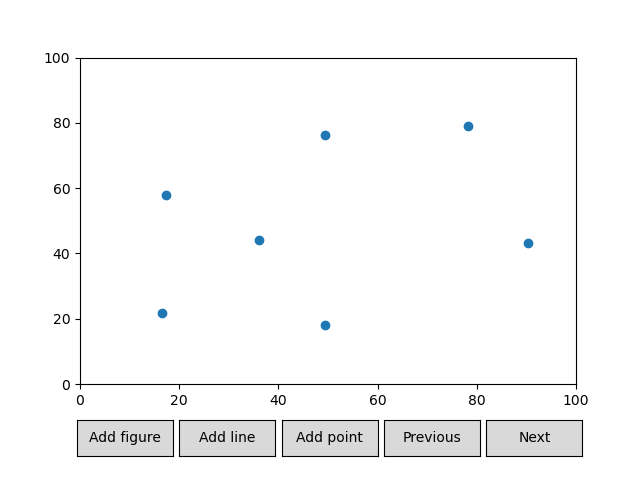

(0.0, 100.0)

In [10]:

%matplotlib notebook

input_plot = visualizers.Plot()
input_plot.draw()
ax = visualizers.plt.gca()
ax.set_xlim((A[0], B[0]))
ax.set_ylim((A[1], B[1]))

## Reset input points

In [11]:
inp_points = []

## Get input points from plot above

In [12]:
inp_points = [*inp_points, *itertools.chain(*map(lambda coll: coll.points, input_plot.get_added_points()))]

## KD-Tree

### Build KD-Tree
<font color="blue">blue lines</font> - dividing lines <br>
<font color="black">black points</font> - input points

<IPython.core.display.Javascript object>


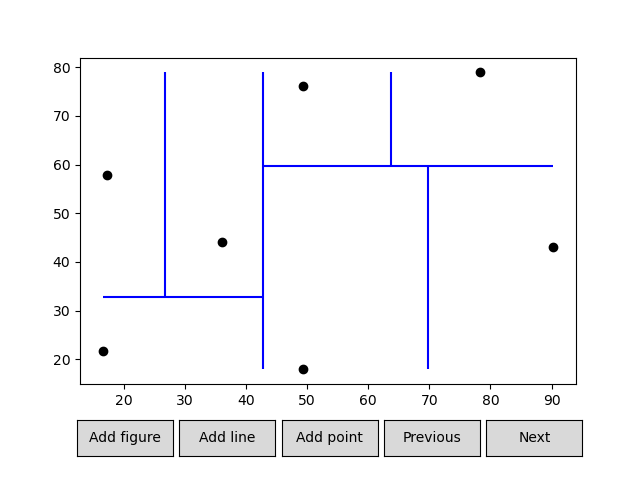

In [13]:
kd_tree = kd_tree_module.KDTree(2, conv_to_np_float64_points(inp_points), True)

if kd_tree.visualizer is not None:
    tree_build_plot = kd_tree.visualizer.get_tree_building_plot()
    tree_build_plot.draw()


### Query KD-Tree
<font color="black">black points</font> - points contained in the kd-tree <br>
<font color="orange">orange points</font> - found points <br>
<font color="green">green rectangle</font> - area of the current kd-tree node <br>
<font color="red">red rectangle</font> - searched area <br>


[[49.37626008064517, 17.970664828431364]]


<IPython.core.display.Javascript object>


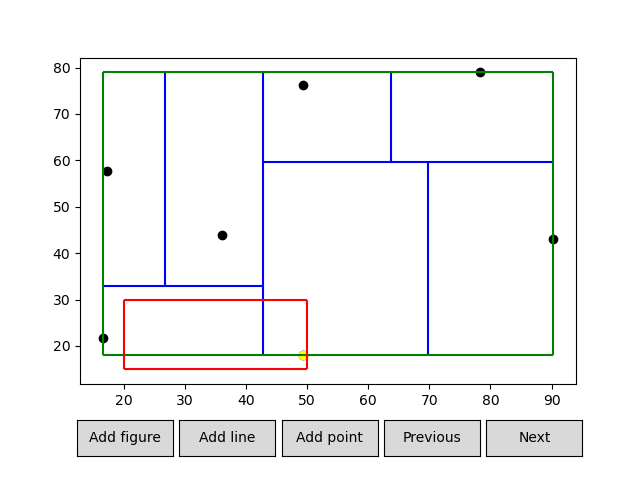

In [14]:
print(kd_tree.find_points_in_area(([np.float64(20), np.float64(15)], [np.float64(50), np.float64(30)])))
if kd_tree.visualizer is not None:
    res_plot = kd_tree.visualizer.get_searching_plot()
    res_plot.draw()


## Quadtree

### Build Quadtree

In [ ]:
quadtree = Quadtree(inp_points, (A, B), 4, True)

### Query QuadTree

In [ ]:
boundary = ((2, 2), (90, 20))
quadtree.query_range(boundary)

### visualize QuadTree operations
<font color="blue">blue points</font> - points contained in the kd-tree <br>
<font color="green">green points</font> - found points <br>
<font color="blue">blue rectangle</font> - area of the node <br>
<font color="green">green rectangle</font> - searched area <br>

In [ ]:
plot = quadtree.visualizer.create_plot()
plot.draw()